# K-means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from utils import *

### Write a function for finding the closest centroids for the data points `find_closest_centroid`  
The method should take the input as `X` matrix and the location of all the data points `centroids`  
The output of the function should be the `idx` vector that holds the index of the centroid which is associated with the corresponding data points  
for every example $$c^{(i)} = j \quad \text{that minimizes} \quad ||x^{(i)} - \mu_j||^{2}$$  
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)

In [2]:
def find_closest_centroid(X, centroids):
    k = centroids.shape[0]
    idx = np.zeros(X.shape[0])
    
    for i in range(X.shape[0]):
        distance = []

        for j in range(k):
            points = np.linalg.norm(X[i] - centroids[j])
            distance.append(points)
        idx[i] = np.argmin(distance)
    # print(points)
    # print(distance)
    return idx

### Load the dataset using the helper function `load_data()` written in file utils.py

In [3]:
X = load_data()

In [4]:
X.shape

(300, 2)

In [5]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroid(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])


First three elements in idx are: [0. 2. 1.]


## Write a method `compute_centroids` which will compute the mean of the points that were assigned to the each centroid.  
here, for every $\mu_k$ we set $$\mu_k = \frac{1}{|C_k|} \sum_{i\in C_k} x{(i)} $$

In [6]:
def compute_centroids(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))

    for i in range(K):
        points = X[idx == i]
        centroids[i] = np.mean(points, axis=0)

    return centroids

In [7]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## Let's run k-means on a sample dataset

In [8]:
def run_kMeans(X, initial_centroids, max_iterations=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    for i in range(max_iterations):
        # output progress
        print("k means iteration %d/%d" % (i, max_iterations - 1))

        idx = find_closest_centroid(X, centroids)

        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        centroids = compute_centroids(X, idx, K)

    plt.show()
    return centroids, idx

k means iteration 0/9
k means iteration 1/9
k means iteration 2/9
k means iteration 3/9
k means iteration 4/9
k means iteration 5/9
k means iteration 6/9
k means iteration 7/9
k means iteration 8/9
k means iteration 9/9


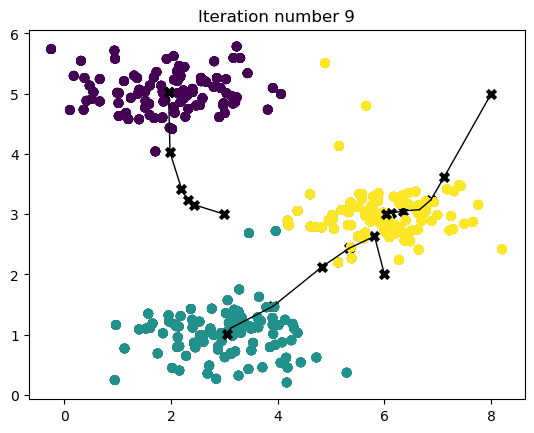

In [9]:
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

## Write a method for random initilization of the centroids at any of th random points from the dataset

In [32]:
def kMeans_init_centroids(X, K):
    randix = np.random.permutation(X.shape[0])
    # print(randix)
    centroids = X[:K]
    return centroids

k means iteration 0/9
k means iteration 1/9
k means iteration 2/9
k means iteration 3/9
k means iteration 4/9
k means iteration 5/9
k means iteration 6/9
k means iteration 7/9
k means iteration 8/9
k means iteration 9/9


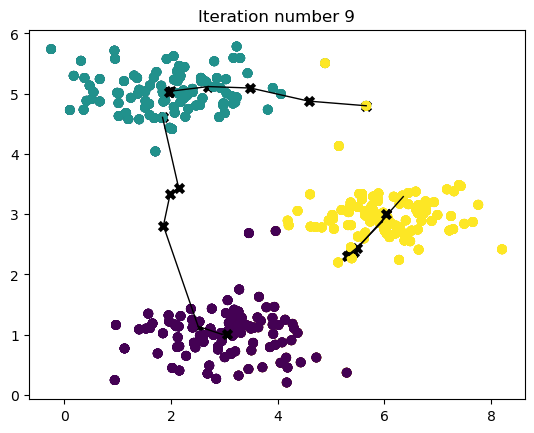

In [35]:
initial_centroids = kMeans_init_centroids(X, 3)
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

# Image Compression using k-means

## Load the imgage using `plt.imread` method

In [23]:
original_img = plt.imread("bird_small.png")

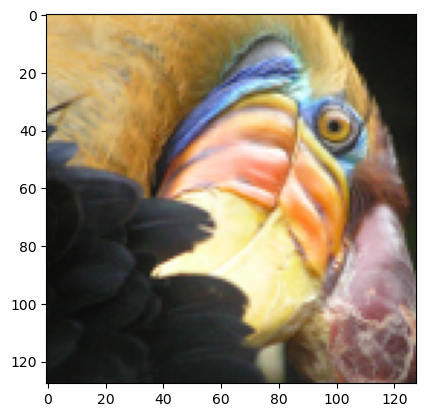

In [25]:
plt.imshow(original_img)

In [26]:
print(f"The shape of the image is: {original_img.shape}")

The shape of the image is: (128, 128, 3)


In [47]:
original_img = original_img / 255

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [48]:
X_img.shape

(16384, 3)

## Run K-means on the the img

In [68]:
K = 12                      
max_iters = 10              

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

k means iteration 0/9
k means iteration 1/9
k means iteration 2/9
k means iteration 3/9
k means iteration 4/9
k means iteration 5/9
k means iteration 6/9
k means iteration 7/9
k means iteration 8/9
k means iteration 9/9


In [69]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [11. 11. 11. 11. 11.]


### Recover the image 

In [70]:
# centroids.shape

recovered_img = centroids[np.int16(idx), :]
print(recovered_img.shape)
X_recovered = np.reshape(recovered_img, original_img.shape)
print(X_recovered.shape)

(16384, 3)
(128, 128, 3)


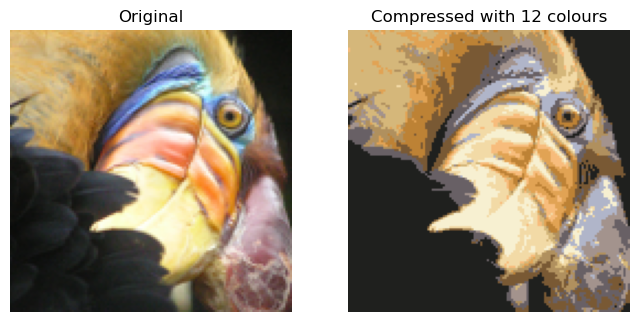

In [71]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()